In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [2]:
df_clean = pd.read_csv('cars.csv')

In [3]:
df = df_clean.copy()

In [4]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [5]:
df.shape

(426880, 26)

In [6]:
df.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [10]:
df.shape

(426880, 26)

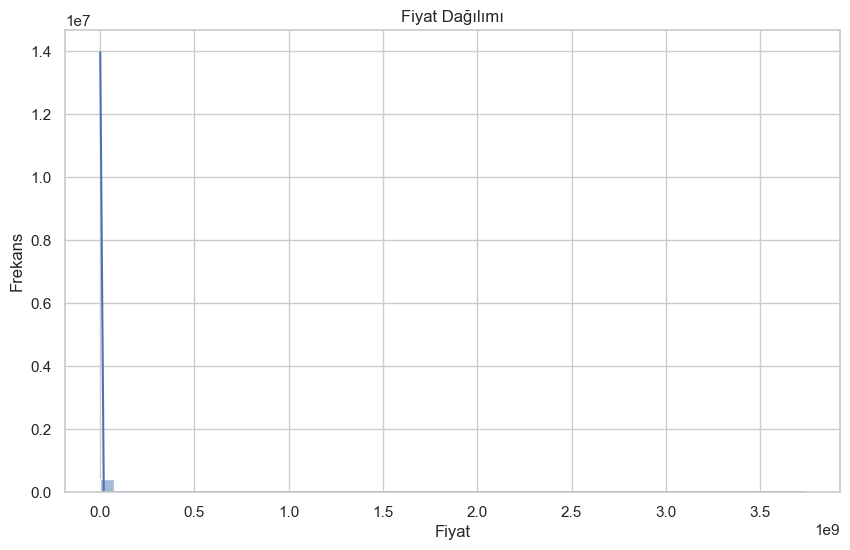

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

In [12]:
print(df["price"].describe())

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


In [13]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count       426880.000
mean         75199.033
std       12182282.174
min              0.000
25%           5900.000
50%          13950.000
75%          26485.750
max     3736928711.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 En YÜKSEK 20 fiyat:
[3736928711 3736928711 3024942282 3024942282 3009548743 1410065407
 1234567890 1111111111 1111111111  987654321  987654321  135008900
  123456789  123456789  123456789  123456789  123456789  123456789
  113456789   99999999]

 Fiyat Aralıkları:
$0 - $500 arası:      42,094 araba
$500 - $1,000:        4,221 araba
$1,000 - $5,000:        48,997 araba
$5,000 - $20,000:       182,570 araba
$20,000 - $50,000:      135,957 araba
$50,000 - $100,000:     12,344 araba
$100,000 - $500,000:     629 araba
$500,000+:              68 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             32,895 araba
$1-100 arası:           3,494 araba
$1,000,000+:            60 arab

In [14]:
df.drop(df[(df['price'] < 500) | (df['price'] > 100000)].index, inplace=True)

In [15]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count   384131.000
mean     19161.445
std      14412.286
min        500.000
25%       7800.000
50%      15900.000
75%      27990.000
max     100000.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500]

 En YÜKSEK 20 fiyat:
[100000 100000 100000 100000 100000 100000 100000 100000 100000 100000
 100000 100000 100000 100000 100000 100000 100000 100000 100000 100000]

 Fiyat Aralıkları:
$0 - $500 arası:      0 araba
$500 - $1,000:        4,221 araba
$1,000 - $5,000:        48,997 araba
$5,000 - $20,000:       182,570 araba
$20,000 - $50,000:      135,957 araba
$50,000 - $100,000:     12,344 araba
$100,000 - $500,000:     42 araba
$500,000+:              0 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             0 araba
$1-100 arası:           0 araba
$1,000,000+:            0 araba


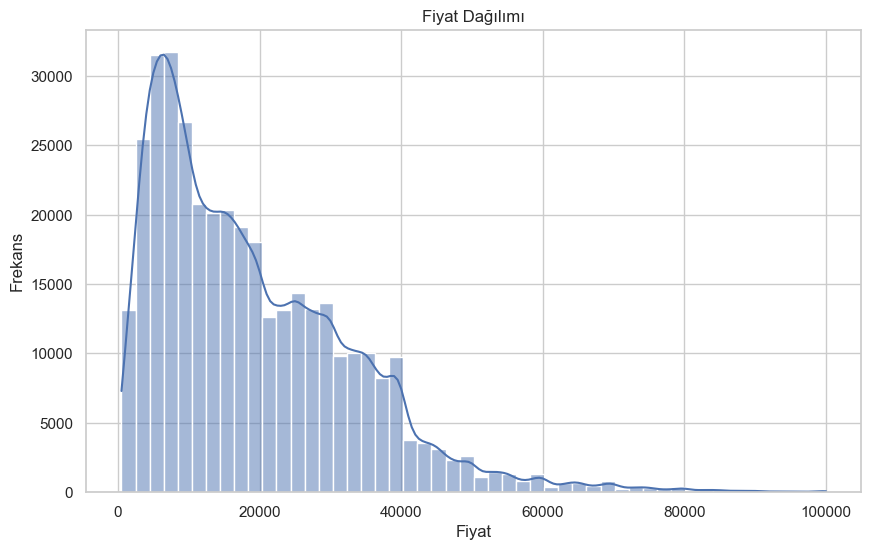

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

In [16]:
#Öncelikle model için önemli olmayan sütunları df den çıkarıcaz.

In [17]:
drop_columns = {"id","url","region","region_url","VIN","image_url","description","lat","long","posting_date","county","state","model","size","paint_color"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384131 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         384131 non-null  int64  
 1   year          382959 non-null  float64
 2   manufacturer  368695 non-null  object 
 3   condition     238824 non-null  object 
 4   cylinders     227216 non-null  object 
 5   fuel          381538 non-null  object 
 6   odometer      382016 non-null  float64
 7   title_status  377134 non-null  object 
 8   transmission  382319 non-null  object 
 9   drive         267115 non-null  object 
 10  type          301079 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 43.2+ MB


In [19]:
for col in df.columns:
    print(f"kolon ismi :{col} -- uniuqe veri sayısı:{df[col].nunique()}\n uniuqe verileri: {df[col].unique()}\n**********************************************")

kolon ismi :price -- uniuqe veri sayısı:14944
 uniuqe verileri: [ 6000 11900 21000 ...  6328 19853 17873]
**********************************************
kolon ismi :year -- uniuqe veri sayısı:112
 uniuqe verileri: [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1991. 1972. 1988. 1994. 1929. 1984. 1986. 1989.
 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977. 1993.
 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980. 1967. 1971.
 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959. 1950. 1930.
 1960. 1922. 1928. 2022. 1901. 1941. 1956. 1924. 1927. 1939. 1923. 1949.
 1961. 1935. 1918. 1938. 1900. 1913. 1916. 1943. 1925. 1921. 1915. 1945.
 1905. 1920. 1944. 1910. 1909.]
**********************************************
kolon ismi :manufacturer -- uniuqe veri sayısı:42


In [20]:
#Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler ile uğraşıcaz.

=== NULL DEĞER ANALİZİ ===

price                0
year              1172
manufacturer     15436
condition       145307
cylinders       156915
fuel              2593
odometer          2115
title_status      6997
transmission      1812
drive           117016
type             83052
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

price           0.000
year            0.305
manufacturer    4.018
condition      37.827
cylinders      40.849
fuel            0.675
odometer        0.551
title_status    1.822
transmission    0.472
drive          30.463
type           21.621
dtype: float64


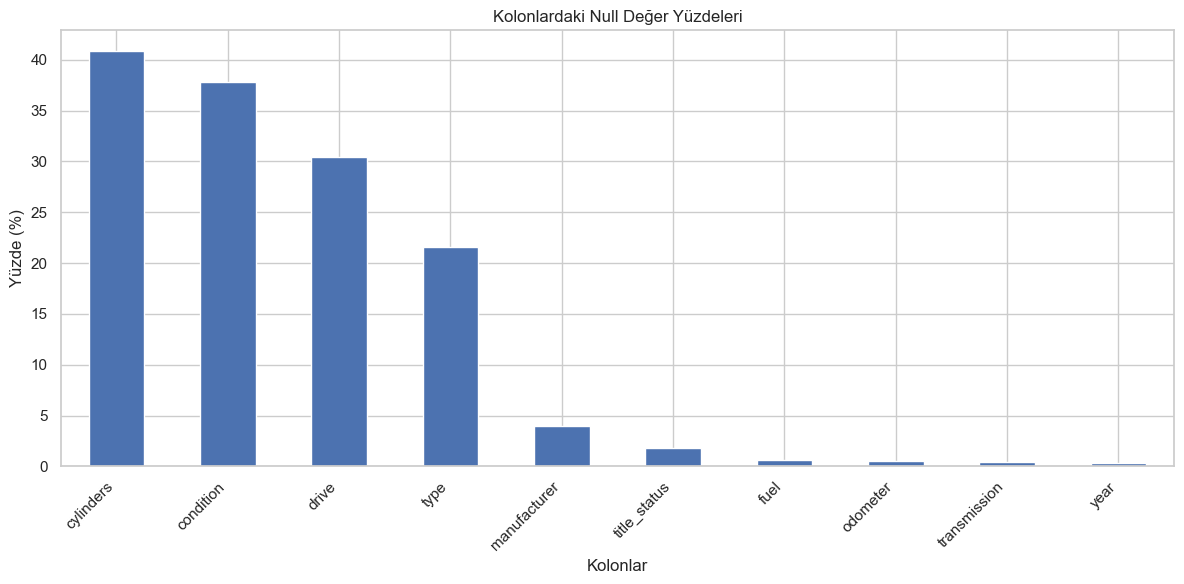


=== Satır Bazında Null Sayıları ===
0     121686
1     115920
2      69891
3      34237
4      39225
5       2702
6         84
7        125
8        198
9          1
10        62
Name: count, dtype: int64


In [21]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== Satır Bazında Null Sayıları ===")
print(df.isnull().sum(axis=1).value_counts().sort_index())

In [22]:
df["year"] = df.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median())
)

In [23]:
df.dropna(subset=["manufacturer"],inplace=True)

In [24]:
df["condition"].fillna("unknown",inplace=True)

In [25]:
groupbyColumns = ["cylinders","fuel","transmission","drive"]

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)

In [26]:
df["odometer"] = df.groupby(["manufacturer","type"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

df.dropna(subset=["odometer"],inplace=True)

In [27]:
df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [28]:
def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1️⃣ Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2️⃣ Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3️⃣ Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\n✅ Type doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 77881
1️⃣ Model isminden type çıkarılıyor...
   Sonrası null: 45922
2️⃣ Manufacturer bazlı mode...
   Sonrası null: 0
3️⃣ Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

✅ Type doldurma tamamlandı!

Type dağılımı:
type
sedan          105549
SUV             80223
pickup          68948
truck           28316
other           19047
coupe           18820
hatchback       16038
van              9791
wagon            9592
convertible      6693
mini-van         4369
offroad           550
bus               277
Name: count, dtype: int64


In [29]:
df.isna().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368213 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         368213 non-null  int64  
 1   year          368213 non-null  float64
 2   manufacturer  368213 non-null  object 
 3   condition     368213 non-null  object 
 4   cylinders     368213 non-null  object 
 5   fuel          368213 non-null  object 
 6   odometer      368213 non-null  float64
 7   title_status  368213 non-null  object 
 8   transmission  368213 non-null  object 
 9   drive         368213 non-null  object 
 10  type          368213 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 33.7+ MB
